# Matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

## Накопительный итог

Создав три случайных временных ряда, мы определили один рисунок `fig`, содержащий одну ось `ax`.

Мы вызываем методы `ax` напрямую, чтобы создать диаграмму со сложенными областями и добавить легенду, заголовок и метку оси `y`. При объектно-ориентированном подходе понятно, что все это - атрибуты `ax`.

`tight_layout()` применяется к объекту `Figure` в целом для очистки пробельных элементов

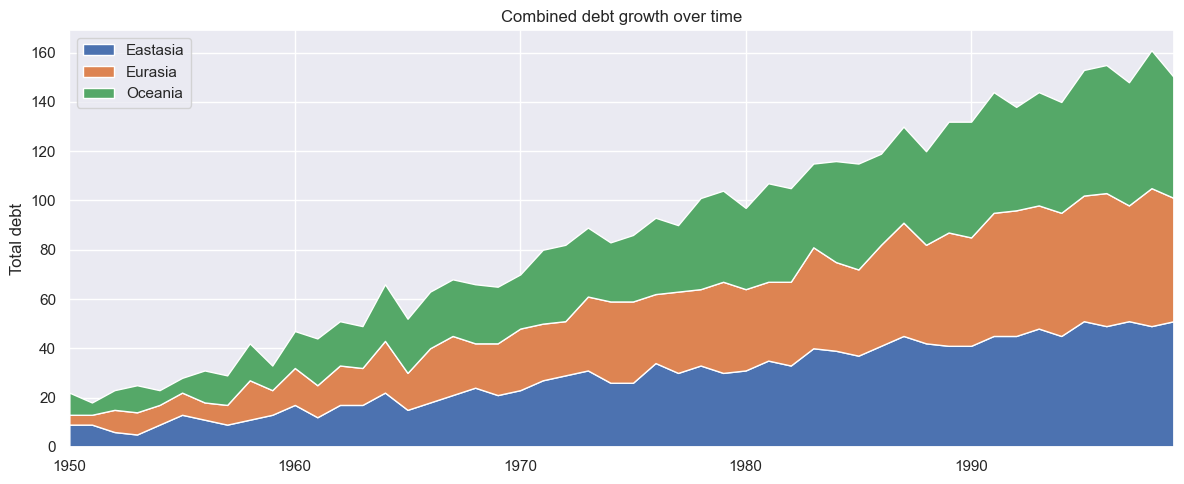

In [30]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(12, 5))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

## Два графика

В этом примере происходит немного больше:

Поскольку мы создаем фигуру "1x2", возвращаемый результат `plt.subplots(1, 2)` теперь представляет собой объект `Figure` и массив `NumPy` объектов `Axes`. Вы можете проверить это с помощью `fig, axs = plt.subplots(1, 2)` и взглянуть на `axs`.

Мы работаем с `ax1` и `ax2` по отдельности. Последняя строка - хорошая иллюстрация иерархии объектов, где мы изменяем ось `yaxis`, принадлежащую только второй `Axes`, размещая ее тики и метки справа.

Текст внутри знаков доллара использует разметку $\LaTeX$ для выделения переменных курсивом.

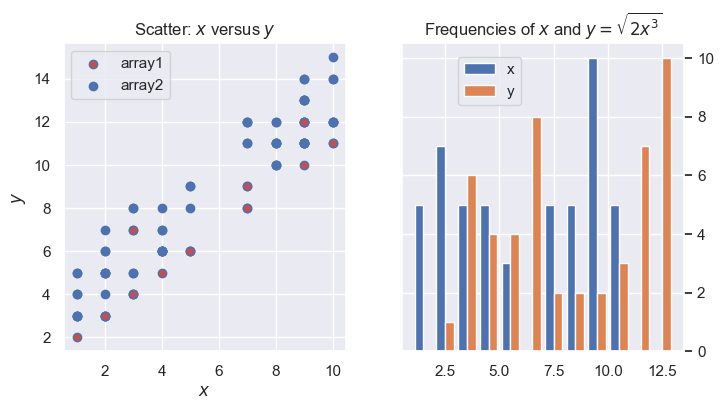

In [45]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
y1 = x + np.random.randint(2, 6, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b', label='array1')
ax1.scatter(x=x[:40], y=y1[:40], marker='o', c='b', label='array2')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.legend()

ax2.hist(data, bins=np.arange(data.min(), data.max()),
        label=('x', 'y'))
ax2.legend(loc=(0.2, 0.8))
ax2.set_title('Frequencies of $x$ and $y=\sqrt{2x^3}$')
ax2.yaxis.tick_right()

## Сложные объединения графиков

Построим графики вида как на предложенном рисунке

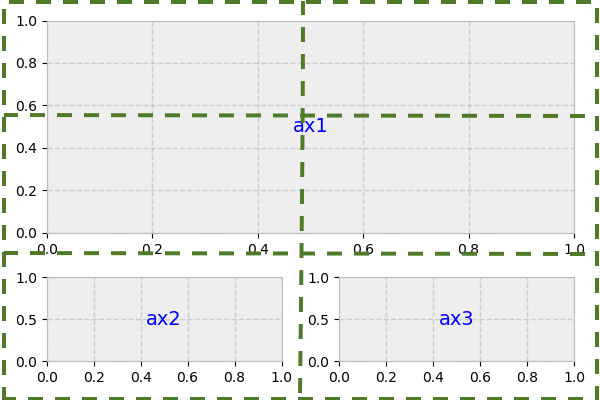

In [8]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

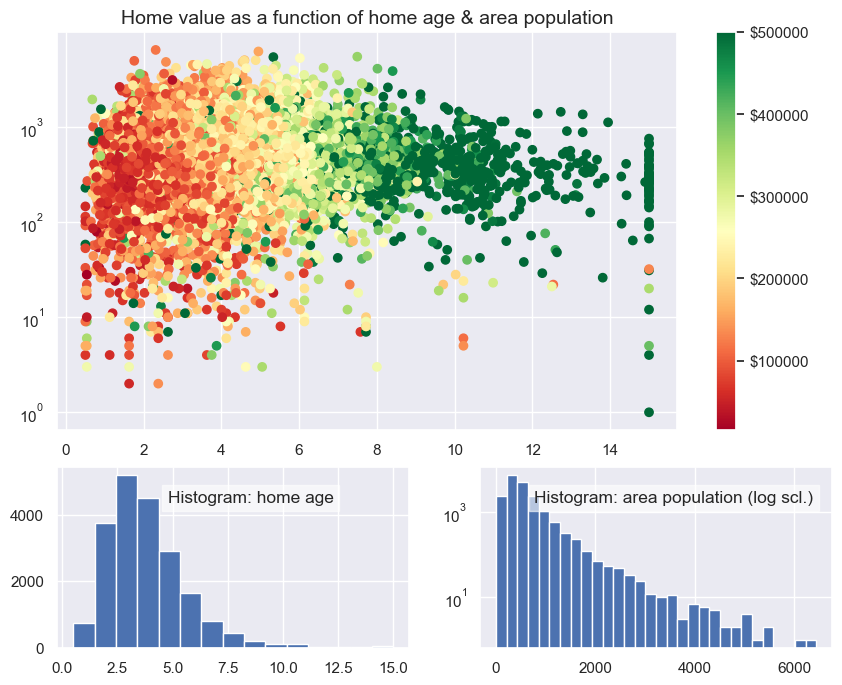

In [47]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')
    
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

gridsize = (3, 2)
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax1.set_xlabel('age')

ax2.hist(age, bins=int(age.max() - age.min())+1)
ax3.hist(pop, bins=30, log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

plt.show()

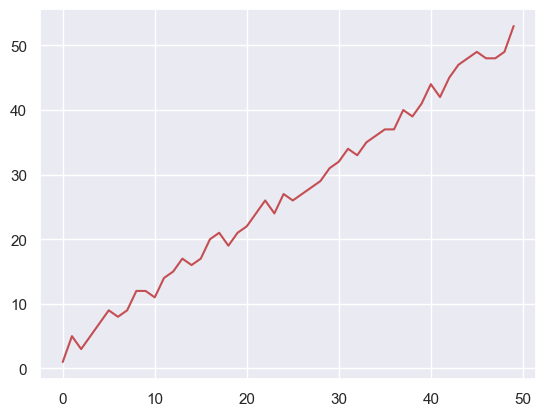

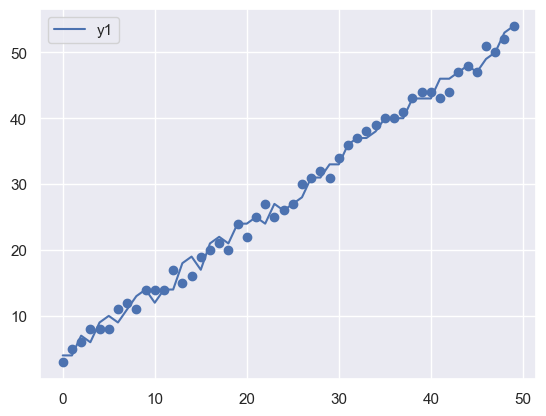

In [75]:
x = np.arange(50)
y = x + np.random.randint(1, 5, size=x.size)
y1 = x + np.random.randint(2, 6, size=x.size)
y2 = x + np.random.randint(2, 6, size=x.size)
data = np.column_stack((x, y))

plt.plot(x, y, c='r', label='y')

plt.show()
plt.plot(x, y1, c='b', label='y1')
plt.scatter(x, y2)
plt.legend()


# Seaborn

In [54]:
import seaborn as sns
import pandas as pd
sns.set()

In [55]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

In [56]:
data.head()

,x,y
0,-2.853014,-0.594584
1,3.605214,0.668849
2,4.384202,-0.921499
3,-3.114203,-0.994706
4,0.411288,1.243845


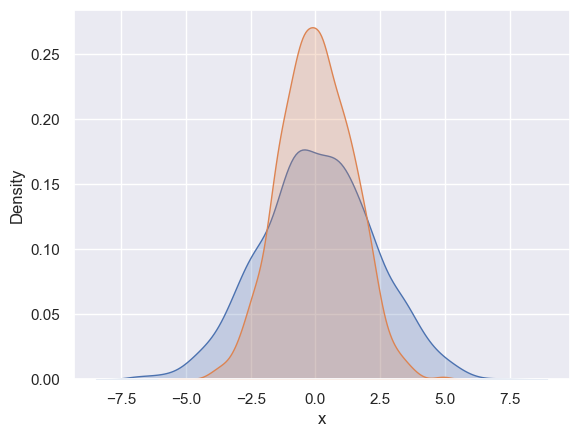

In [57]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

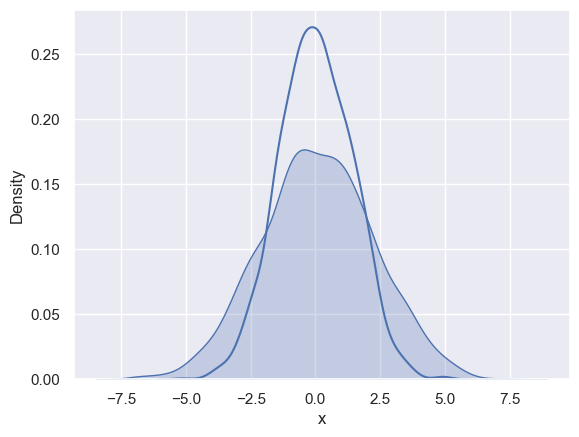

In [59]:
sns.kdeplot(data['x'], fill=True)
sns.kdeplot(data['y'], fill=False);

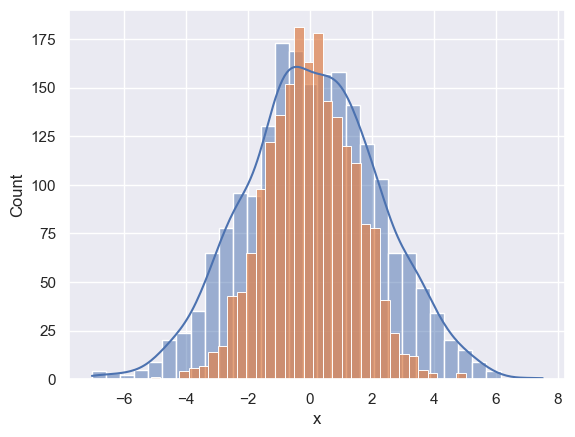

In [61]:
sns.histplot(data['x'], kde=True);
sns.histplot(data['y']);

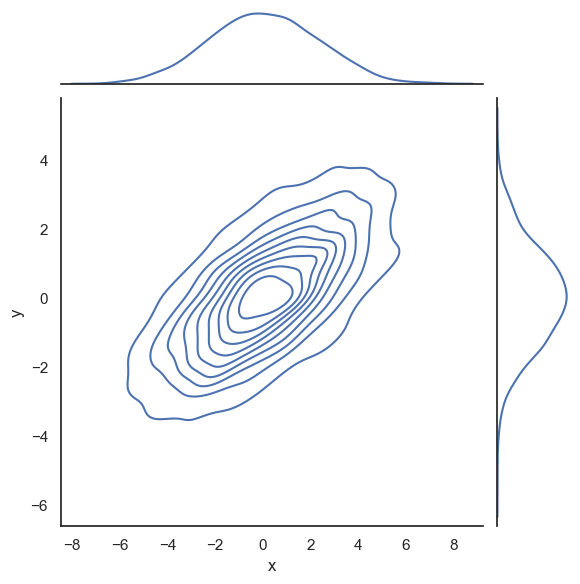

In [56]:
with sns.axes_style('white'):
    sns.jointplot(data=data, x='x', y='y', kind='kde');

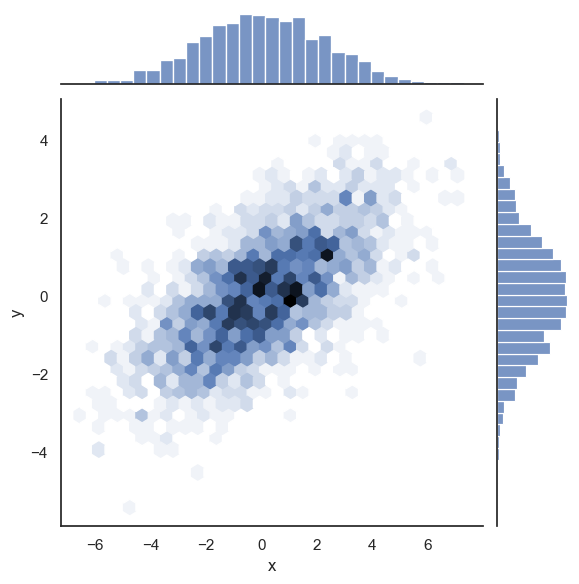

In [58]:
with sns.axes_style('white'):
    sns.jointplot(data=data, x='x', y='y', kind='hex')

**pair plots**

In [12]:
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


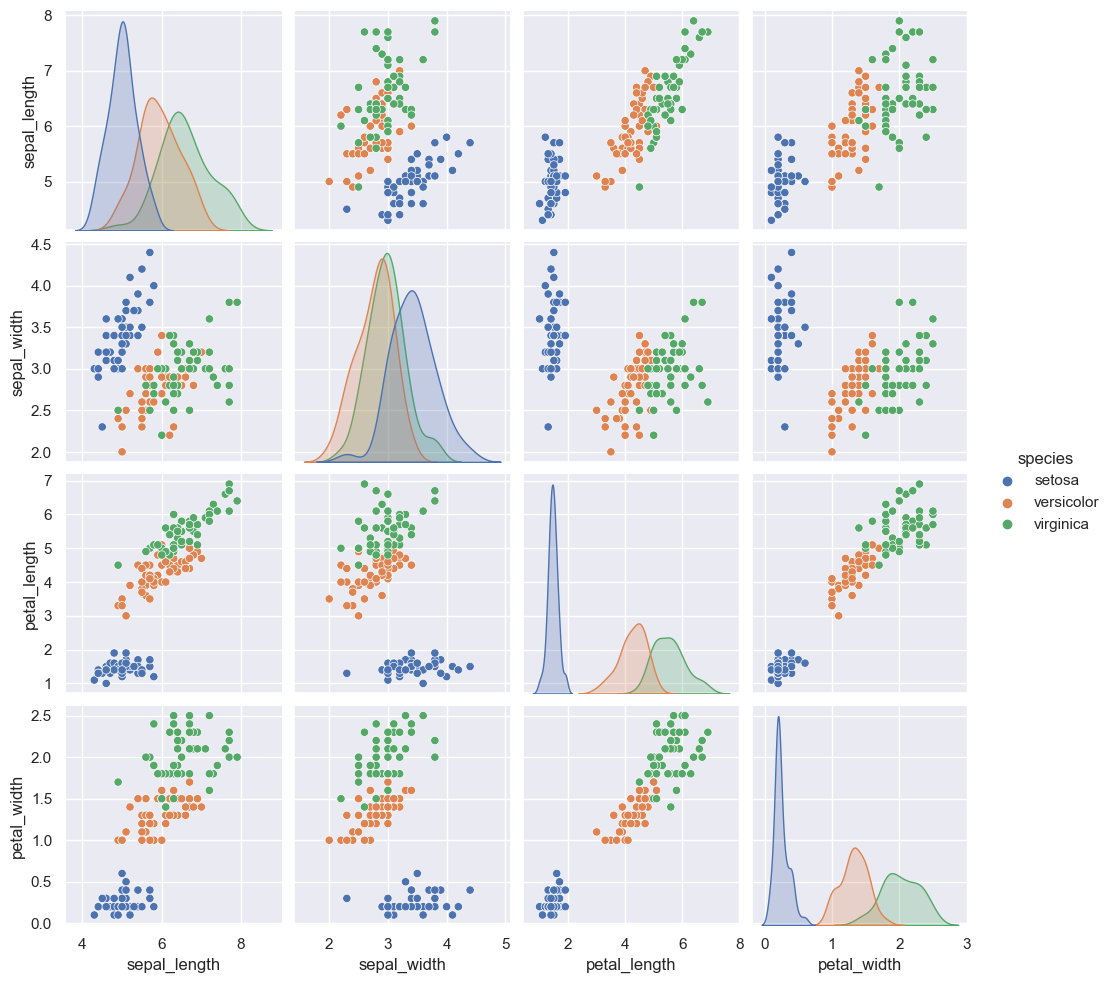

In [61]:
sns.pairplot(iris, hue='species', height=2.5);

In [62]:
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


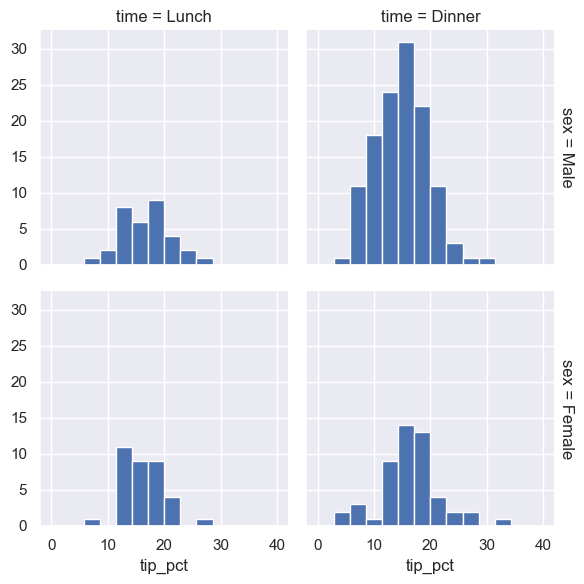

In [14]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

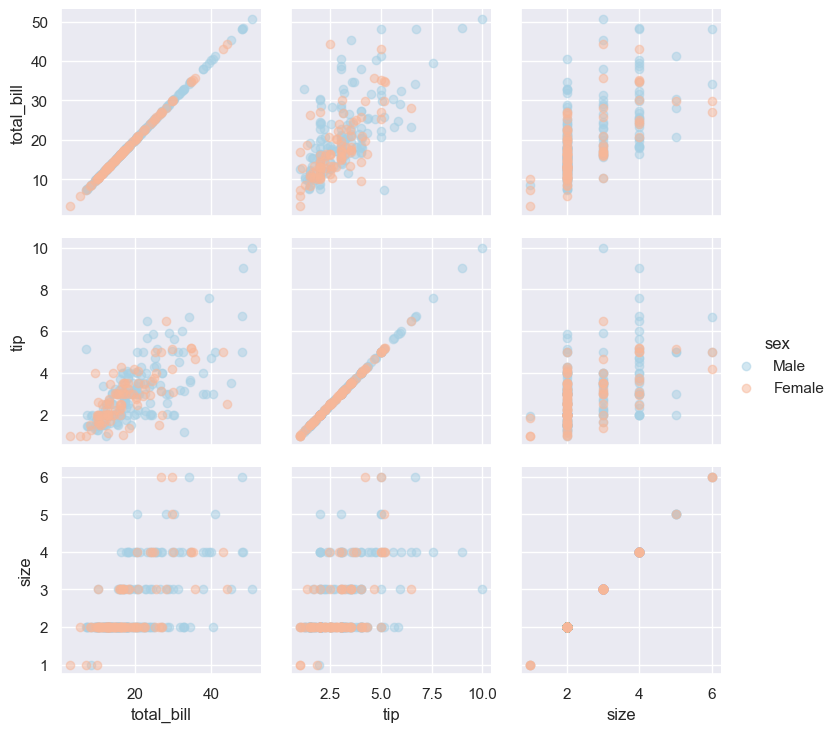

In [63]:
g = sns.PairGrid(tips,
                hue='sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.5);
g.add_legend();

Можно комбинировать графики из матплотлиба и сиборна

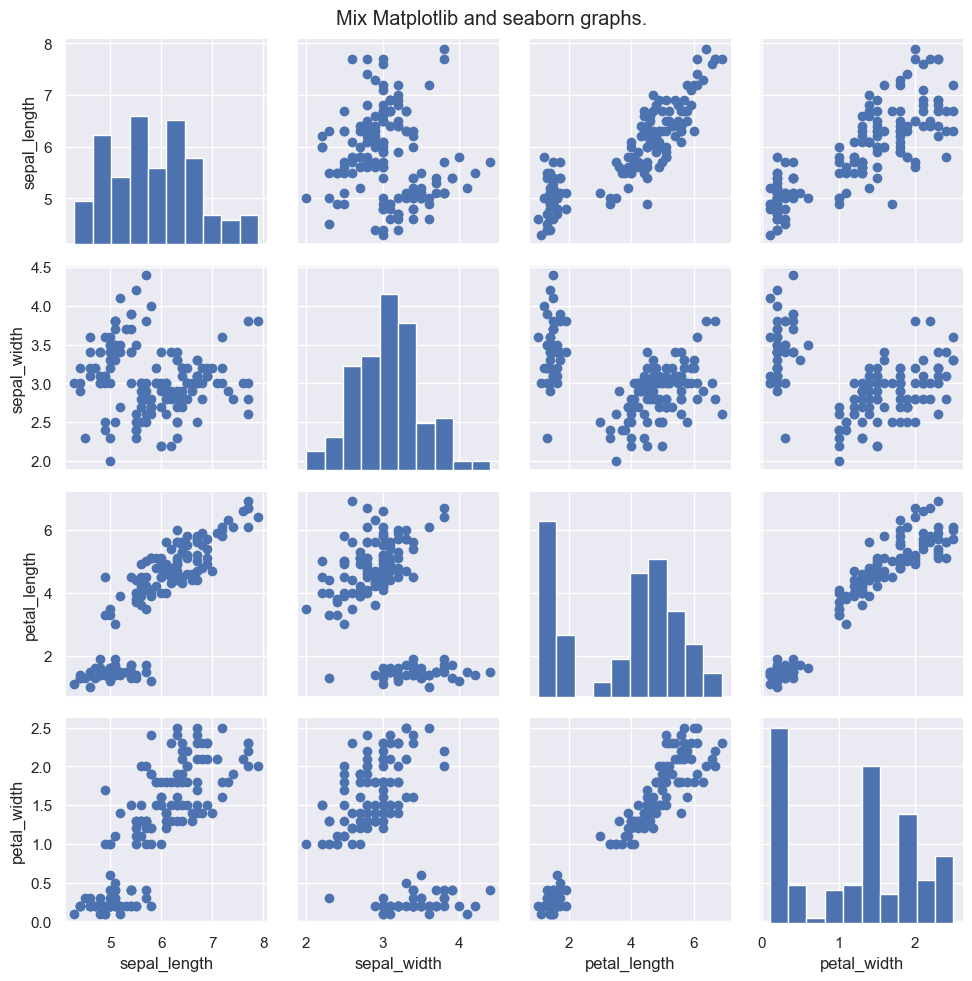

In [65]:
df = sns.load_dataset('iris')
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Mix Matplotlib and seaborn graphs.')
plt.show()

# Plotly

plotly.express - high level API for easy plotting

In [77]:
import plotly.express as px

In [78]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug",
                   hover_data=df.columns, width=800, height=600)
fig.show()

In [81]:
fig = px.histogram(df, x="total_bill", y="tip", color="sex",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

## Dash (bonus)

open `terminal` and run:
python app.py

open `terminal` and run:
python stocks_demo.py